In [22]:
import pandas as pd  
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (14,7)

In [23]:
df = pd.read_csv('../data/drafting/International_2016_drafting.csv')
df1 = pd.read_csv('../data/drafting/International_2017_drafting.csv')
df2 = pd.read_csv('../data/drafting/International_2018_drafting.csv')
df3 = pd.read_csv('../data/drafting/International_2019_drafting.csv')
df4 = pd.read_csv('../data/drafting/International_2021_drafting.csv')

hero = pd.read_csv('../data/hero-names/hero_name.csv')

In [24]:
hero_name = {}
for i in range(0,len(hero['hero'])):
    hero_name[hero.iloc[i]['heroid']] = hero.iloc[i]['hero'] 

#replacing hero number with names
df.replace(hero_name,inplace=True)
df1.replace(hero_name,inplace=True)
df2.replace(hero_name,inplace=True)
df3.replace(hero_name,inplace=True)
df4.replace(hero_name,inplace=True)


total = pd.DataFrame()
total = total.append([df,df1,df2,df3,df4])


list1 = ['Ban_T1_1','Ban_T1_2','Ban_T1_3','Ban_T1_4','Ban_T1_5']
list2 = ['Ban_T2_1','Ban_T2_2','Ban_T2_3','Ban_T2_4','Ban_T2_5']
def combined(df,list1,list2):
    dfbans = pd.DataFrame()
    dummy1 = df[list1]
    dummy2 = df[list2]
    dummy2.columns = dummy1.columns
    dfbans = dfbans.append([dummy1,dummy2])
    return dfbans

#for bans
totalbans = combined(total,list1,list2)
df4bans = combined(df4,list1,list2)
df3bans = combined(df3,list1,list2)
df2bans = combined(df2,list1,list2)
df1bans = combined(df1,list1,list2)
dfbans = combined(df,list1,list2)



#for pick as per order
list1 = ['Pick_T1_1','Pick_T1_2','Pick_T1_3','Pick_T1_4','Pick_T1_5']
list2 = ['Pick_T2_1','Pick_T2_2','Pick_T2_3','Pick_T2_4','Pick_T2_5']
totalpicks = combined(total,list1,list2)
df4picks = combined(df4,list1,list2)
df3picks = combined(df3,list1,list2)
df2picks = combined(df2,list1,list2)
df1picks = combined(df1,list1,list2)
dfpicks = combined(df,list1,list2)


In [25]:
def donutplot(df,attr,title):
    unique= np.unique(np.array(df[attr]),return_counts=True)
    id = np.argsort(-unique[1])
    u = unique[0][id]
    v = unique[1][id]
    explode = (.1,0,0.,0,0.,0,0.,0,0.,0)
    plt.pie(v[:10],labels=u[:10],colors=sbn.color_palette('bright'),explode=explode)
    plt.legend(bbox_to_anchor = (1.6,1.11) )
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    plt.title(title)
    fig.gca().add_artist(centre_circle)
    print()

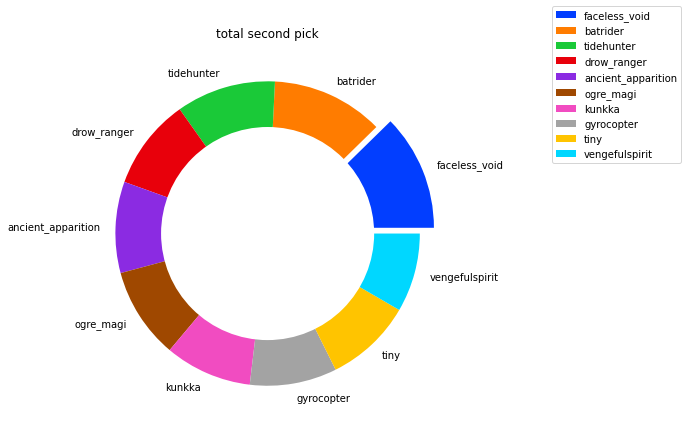

In [26]:
donutplot(total,'Pick_T1_2','total second pick')

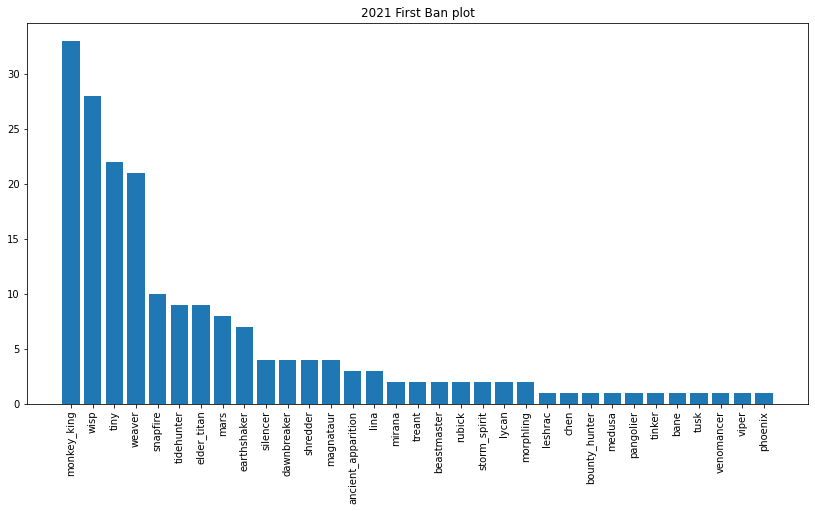

In [27]:
def pickbanplot (df,i,j):
    unique= np.unique(np.array(df[i]),return_counts=True)
    id = np.argsort(-unique[1])
    u = unique[0][id]
    v = unique[1][id]
    plt.bar(u,v,linewidth=2)
    plt.xticks(rotation=90)
    plt.title(j)
    print()

#to plot multile change df , attribuite 
#df is 2016 similary upto df4 is 2021 
#two teams T1 represent 1 pick/ban 
pickbanplot(df4,'Ban_T1_5','2021 Fifth Ban plot')

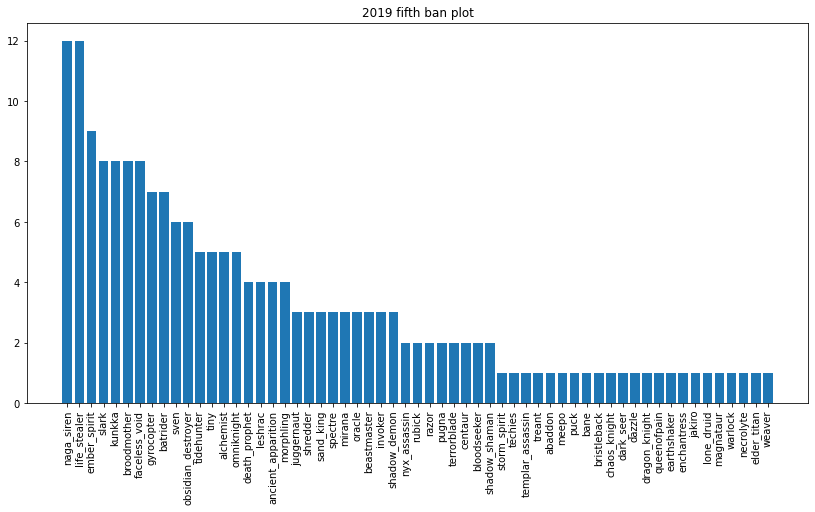

In [30]:
pickbanplot(df3,'Ban_T1_5','2019 fifth ban plot')

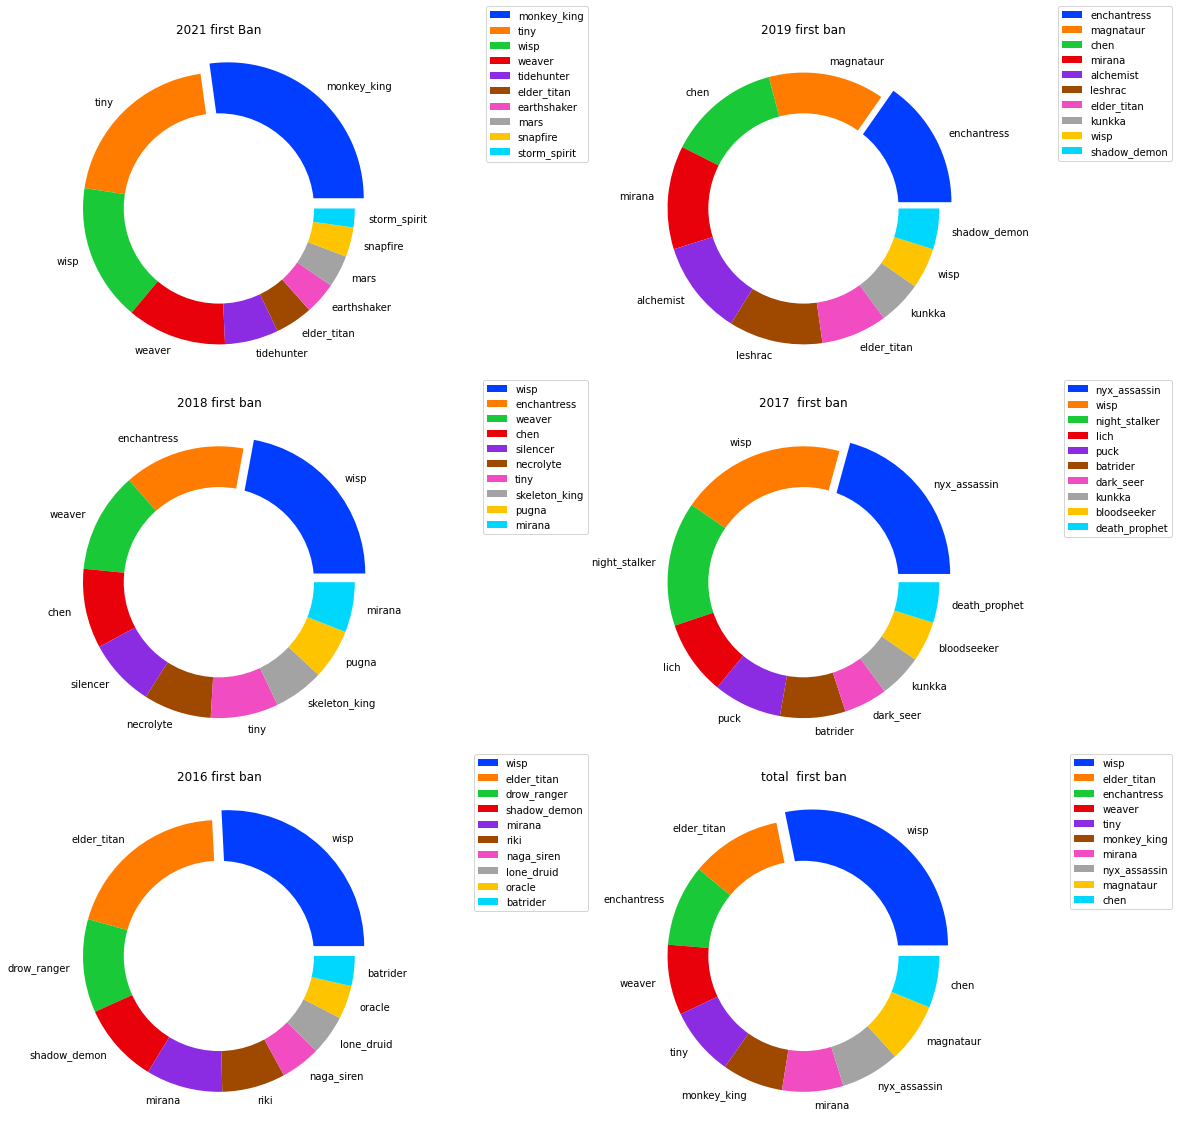

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(3,2,1)
donutplot(df4bans,'Ban_T1_1','2021 first Ban')
plt.subplot(3,2,6)
donutplot(total,'Ban_T1_1','total  first ban')
plt.subplot(3,2,2)
donutplot(df3bans,'Ban_T1_1','2019 first ban')
plt.subplot(3,2,3)
donutplot(df2bans,'Ban_T1_1','2018 first ban')
plt.subplot(3,2,4)
donutplot(df1bans,'Ban_T1_1','2017  first ban')
plt.subplot(3,2,5)
donutplot(dfbans,'Ban_T1_1','2016 first ban')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

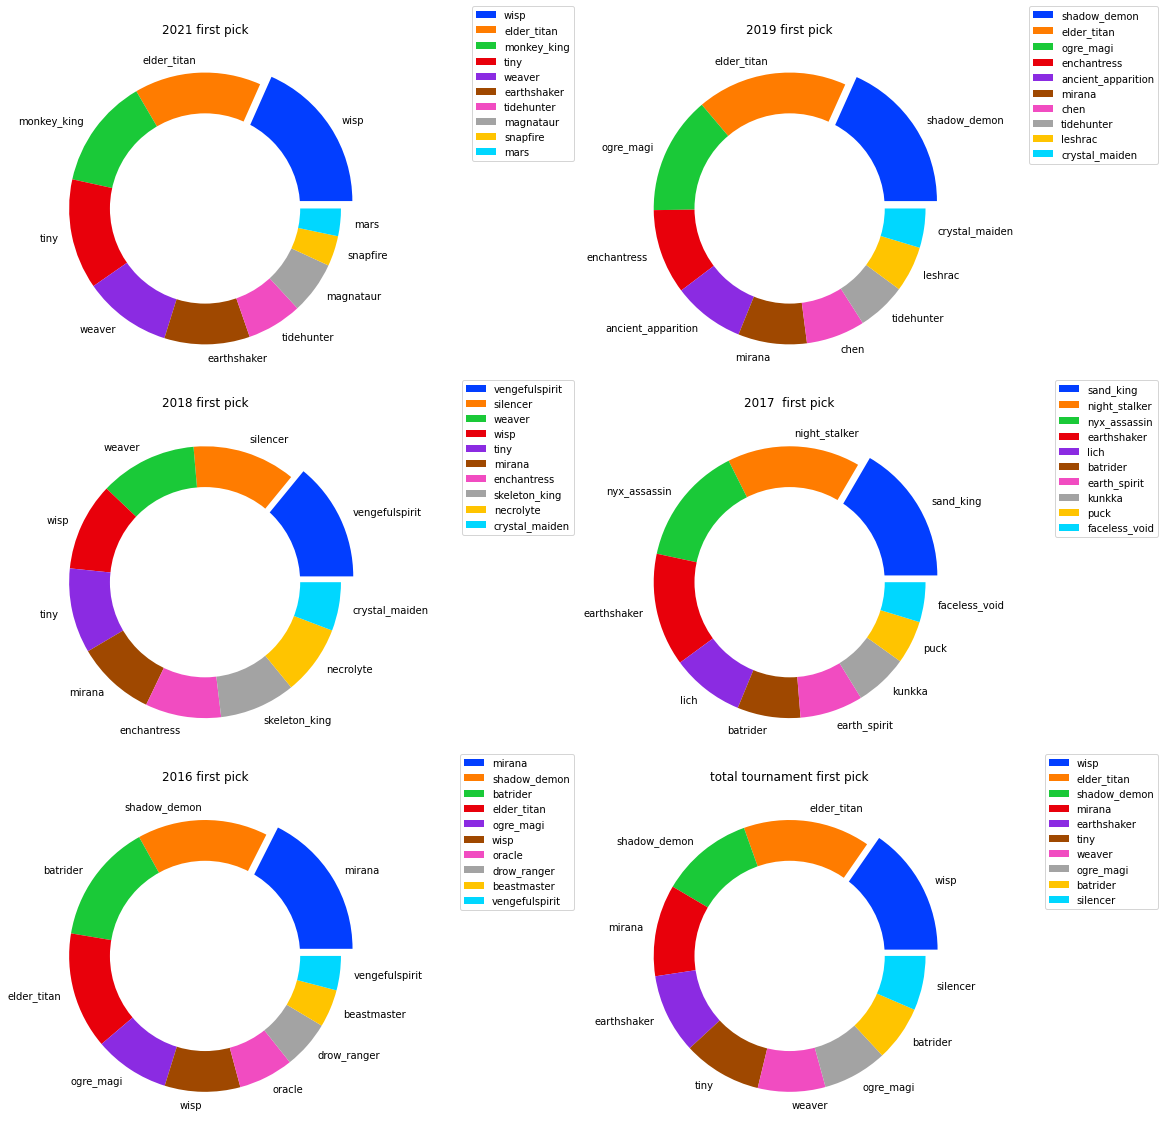

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(3,2,1)
donutplot(df4picks,'Pick_T1_1','2021 first pick')
plt.subplot(3,2,6)
donutplot(totalpicks,'Pick_T1_1','total tournament first pick')
plt.subplot(3,2,2)
donutplot(df3picks,'Pick_T1_1','2019 first pick')
plt.subplot(3,2,3)
donutplot(df2picks,'Pick_T1_1','2018 first pick')
plt.subplot(3,2,4)
donutplot(df1picks,'Pick_T1_1','2017  first pick')
plt.subplot(3,2,5)
donutplot(dfpicks,'Pick_T1_1','2016 first pick')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)